### Fig. 2

First run `get_linear_coeff_and_rhc_profiles.sh` to get the linear coefficient and critical relative humidity profiles.

In [1]:
from __future__ import print_function
from __future__ import division
import os
import sys
sys.path.append('../scripts/')
import numpy as np
import xarray as xr
import proplot as plot
import warnings
warnings.filterwarnings("ignore")
from analysis_functions import get_unique_line_labels

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


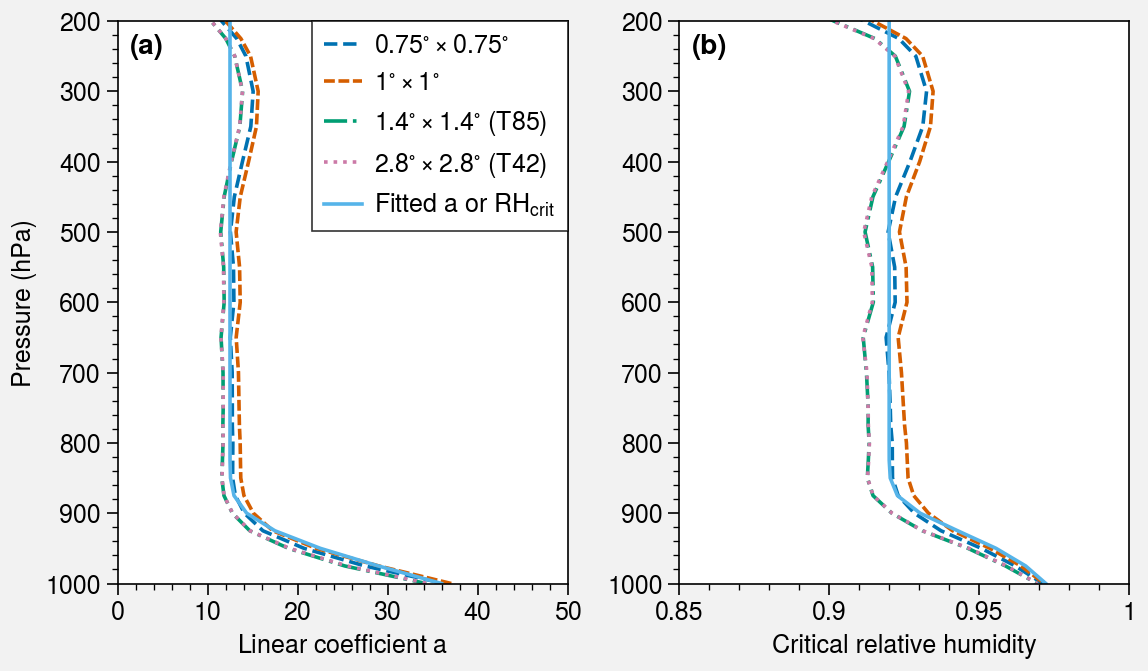

In [2]:
P = os.path.join
fig_dir = '../figs/'
if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)

## =============================================================================== ##
##                  plot for different resolutions
## =============================================================================== ##

resolution_name = ['0.75_deg', '1_deg', 'T85', 'T42']
resolution_str = [r'$0.75^{\circ}\times 0.75^{\circ}$',  
                  r'$1^{\circ}\times 1^{\circ}$', 
                  r'$1.4^{\circ}\times 1.4^{\circ}$ (T85)', 
                  r'$2.8^{\circ}\times 2.8^{\circ}$ (T42)']
linestyles = ['--' , (0, (3, 1, 3, 1)), '-.', ':']    # '-', ,  (0, (3, 1, 1, 1))

lat_str_arr = ['90S_90N']

varnms = ['para_a', 'rhc']
dt_fnms = ['linear_11', 'spookie']
labels = [r'Linear coefficient $a$', 'Critical relative humidity']

plot.close('all')
fig, axes = plot.subplots(nrows=1, ncols=2, aspect=(0.8, 1), sharex=False, sharey=True)

lines = []

for ax, varnm, labl in zip(axes, varnms, labels):
    for ii, (res_nm, res_str, l_style) in enumerate(zip(resolution_name, resolution_str, linestyles)):
        for k, lat_str in enumerate(lat_str_arr):
            if 'para_a' in varnm:
                dt_dir = './data/coeff_a_data'
                fn_var_nm = 'coeff_a'
            else:
                dt_dir = './data/rhc_data'
                fn_var_nm = 'rhc'
     
            if '0.75' in res_nm:
                dt_dir = P(dt_dir, 'high_res_0.75')

            if 'T42' in res_nm or 'T85' in res_nm or '1_deg' in res_nm:
                fn = P(dt_dir, '_'.join(['fit', fn_var_nm, '2017', res_nm, lat_str + '.nc']))
                ds = xr.open_dataset(fn, decode_times=False)
            else:
                fn_arr = [ P(dt_dir, '_'.join(['fit', fn_var_nm, '2017' + str(mon+1).zfill(2),
                            res_nm, lat_str + '.nc'])) for mon in range(0,12) ]
                ds = xr.open_mfdataset(fn_arr, decode_times=False)

            var = ds[varnm]
            levels = ds.level

            l = ax.plot(var.mean('time'), levels, color='C'+str(ii), 
                        linestyle=l_style, label=res_str)
            lines.extend(l)

    a_surf = 36  #42
    a_top = 12.5 #13
    nx = 12      #11
    ps = 1e3

    coeff_a_fit = a_top + (a_surf-a_top)*np.exp(1.0 - (ps/levels)**nx)
    if 'para_a' in varnm:
        var_fit = coeff_a_fit
    else:
        var_fit = 1 - 1 / coeff_a_fit
    l = ax.plot(var_fit, levels, color='C5', linestyle='-', label=r'Fitted $a$ or RH$_{crit}$')
    lines.extend(l)

    if 'para_a' in varnm:
        xlim = [0, 50]
    else:
        xlim = [0.85, 1]
    ax.set_xlim(xlim)
    ax.set_ylim([200, 1000])

    ax.set_xlabel(labl)
    ax.invert_yaxis()

new_lines, new_labels = get_unique_line_labels(lines)
axes[0].legend(new_lines, new_labels, ncol=1, frame=True, center=False)

axes.format(grid=False, ylabel='Pressure (hPa)', abc=True, abcloc='ul', abcstyle='(a)')
fig_name = P(fig_dir, 'linear_coeff_a_and_rhc_profile_2017.pdf')
fig.savefig(fig_name, transparent=False)
fig.savefig(fig_name.replace('.pdf', '.eps'), transparent=False)